In [1]:
import pandas as pd
data = {
    "ID": [0,1,2,3,4,5,6,7,8,9],
    "A" : [59, 24, 62, 48, 58, 19, 32, 88, 47, 63],
    "B" : [49, 50, 49, 54, 45, 52, 56, 48, 45, 52]
}
df = pd.DataFrame(data)
print(df["A"].mean())
print(df["B"].mean())

50.0
50.0


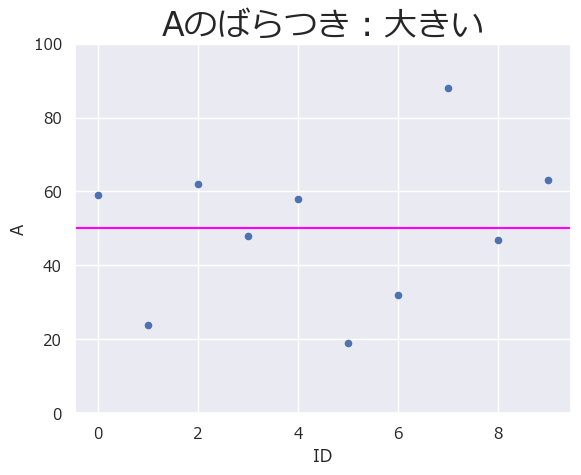

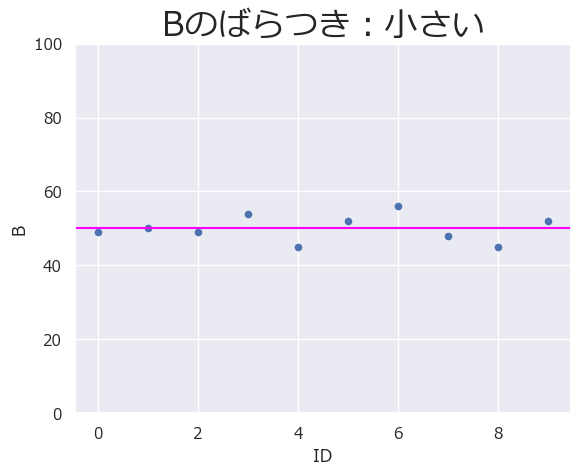

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font=["Meiryo"])

df.plot.scatter(x="ID", y="A", color="b", ylim=(0,100))
plt.axhline(y=50, c="Magenta")
plt.title("Aのばらつき：大きい", fontsize=24)
plt.show()

df.plot.scatter(x="ID", y="B", color="b", ylim=(0,100))
plt.axhline(y=50, c="Magenta")
plt.title("Bのばらつき：小さい", fontsize=24)
plt.show()

In [4]:
print(df.var())

ID      9.166667
A     430.666667
B      12.888889
dtype: float64


In [5]:
print(df.std())

ID     3.02765
A     20.75251
B      3.59011
dtype: float64


In [6]:
meanA = df["A"].mean()
stdA = df["A"].std()
print(meanA - stdA, "〜", meanA + stdA)

29.247490111635493 〜 70.7525098883645


In [7]:
meanB = df["B"].mean()
stdB = df["B"].std()
print(meanB - stdB, "〜", meanB + stdB)

46.409890128577 〜 53.590109871423


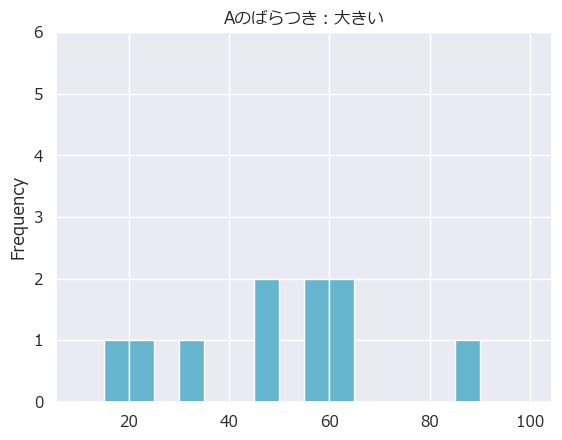

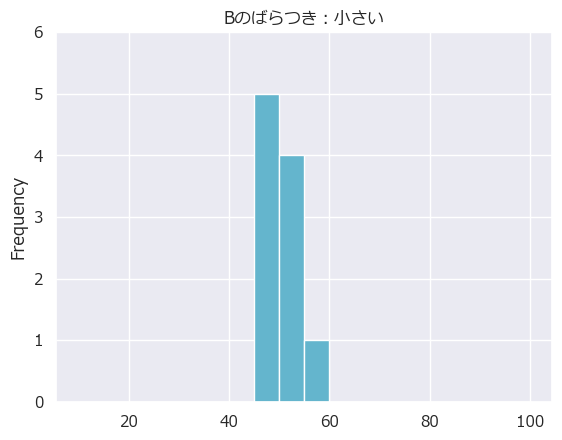

In [8]:
bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

df["A"].plot.hist(bins=bins, color="c",ylim=(0,6))
plt.title("Aのばらつき：大きい")
plt.show()

df["B"].plot.hist(bins=bins, color="c",ylim=(0,6))
plt.title("Bのばらつき：小さい")
plt.show()

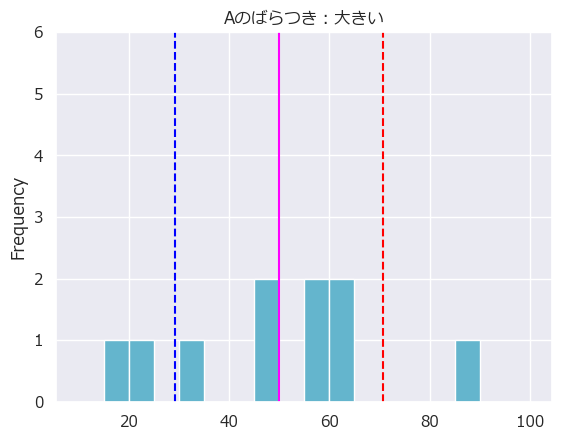

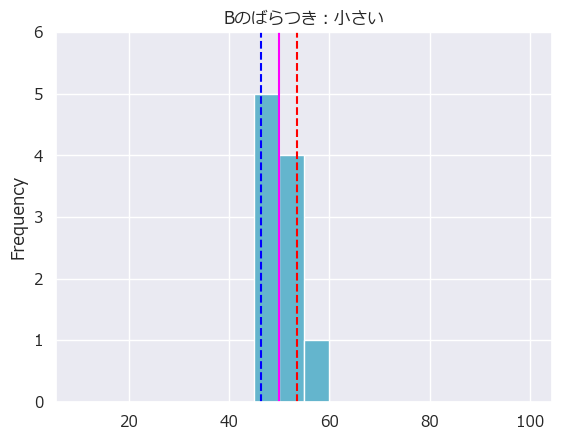

In [9]:
df["A"].plot.hist(bins=bins, color="c",ylim=(0,6)) # 6はy軸の最大値
plt.axvline(x=meanA, color="magenta") # 平均値
plt.axvline(x=meanA - stdA, color="blue", linestyle="--") # 標準偏差
plt.axvline(x=meanA + stdA, color="red", linestyle="--") # 標準偏差
plt.title("Aのばらつき：大きい")
plt.show()

df["B"].plot.hist(bins=bins, color="c",ylim=(0,6))
plt.axvline(x=meanB, color="magenta")
plt.axvline(x=meanB - stdB, color="blue", linestyle="--")
plt.axvline(x=meanB + stdB, color="red", linestyle="--")
plt.title("Bのばらつき：小さい")
plt.show()

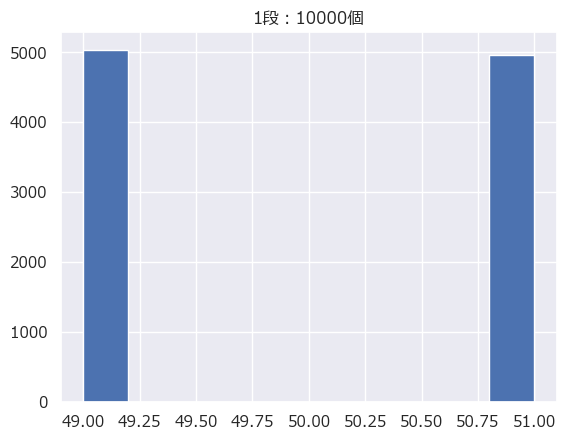

In [2]:
%matplotlib inline
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font=["Meiryo"])

# ゴルトンボード表示関数：段数、玉数を指定する
def galton(steps, count) :
# 玉が落ちた位置を入れる空のリストを用意する
    ans = []
    # 指定された玉数だけくり返す
    for i in range(count):
        # 玉を落とす最初の位置を50にする
        val = 50
        # 指定された段数だけくり返す
        for j in range(steps):
            # 0か1のランダムで、0なら-1、1なら+1
            if random.randint(0, 1) == 0:
                val = val -1
            else :
                val = val + 1
        # 最終的に玉が落ちた位置をリストに追加する
        ans.append(val)
    
    # 落下した結果のリストをデータフレームにして
    df = pd.DataFrame(ans)
    # 0列目（落とした結果の列）をヒストグラムで表示
    df[0].plot.hist()
    plt.title(str(steps)+"段："+str(count)+"個")
    plt.ylabel("")
    plt.show()

galton(1, 10000)

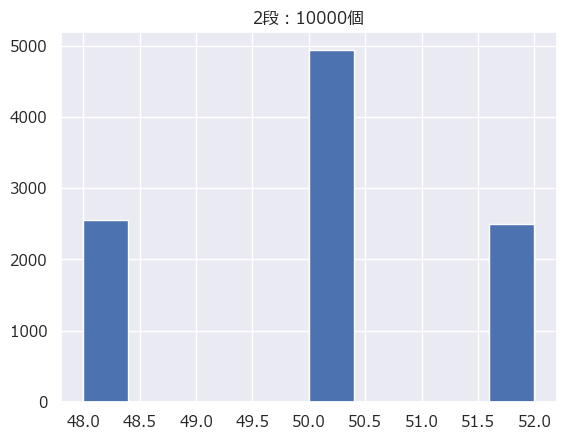

In [3]:
galton(2, 10000)

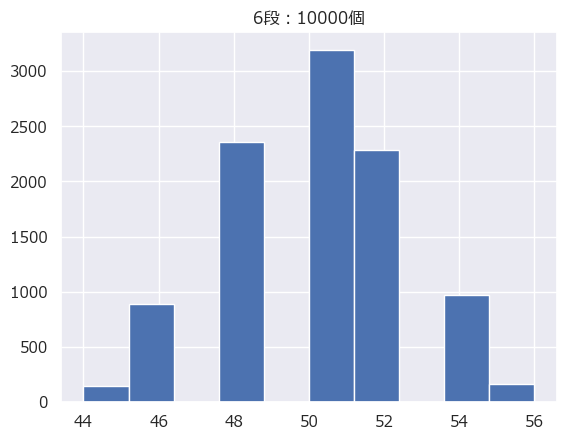

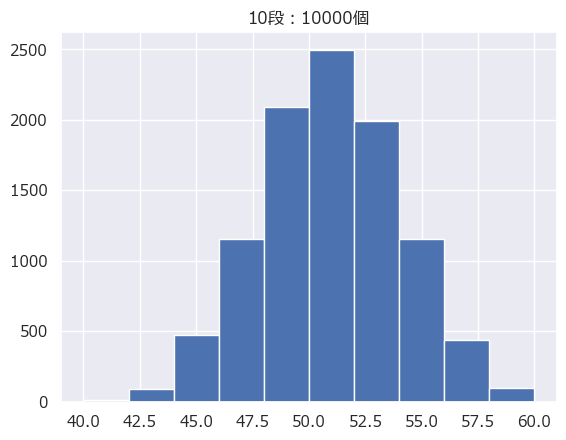

In [4]:
galton(6, 10000)
galton(10, 10000)

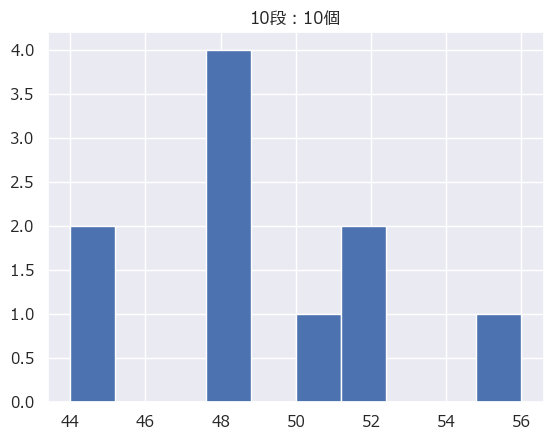

In [10]:
galton(10, 10) 

In [12]:
from scipy.stats import norm

mean = 166.8
std = 5.8
value = 160.0

cdf = norm.cdf(x=value, loc=mean, scale=std)
print(value,"は、下から", cdf*100,"%")

160.0 は、下から 12.051548220947089 %


In [13]:
mean = 166.8
std = 5.8
value = 178.0

cdf = norm.cdf(x=value, loc=mean, scale=std)
print(value,"は、上から", (1-cdf)*100,"%")

178.0 は、上から 2.6739394108996173 %


In [14]:
mean = 166.8
std = 5.8
per = 0.20

ppf = norm.ppf(q=per, loc=mean, scale=std)
print("下から", per * 100, "%の値は、", ppf, "です。")

下から 20.0 %の値は、 161.9185968452771 です。


In [15]:
mean = 166.8
std = 5.8
per = 0.01

ppf = norm.ppf(q=(1-per), loc=mean, scale=std)
print("上から", per * 100, "%の値は、", ppf, "です。")

上から 1.0 %の値は、 180.2928176694369 です。


In [16]:
from scipy.stats import norm

scoreM=60
meanM = 50
stdM = 5

scoreE=80
meanE = 70
stdE = 8

cdf = norm.cdf(x=scoreM, loc=meanM, scale=stdM)
print("数学の", scoreM, "点は、上から", (1-cdf)*100, "%")

cdf = norm.cdf(x=scoreE, loc=meanE, scale=stdE)
print("英語の", scoreE, "点は、上から", (1-cdf)*100, "%")

数学の 60 点は、上から 2.275013194817921 %
英語の 80 点は、上から 10.564977366685536 %


C:\Users\frontier-Python\AppData\Local\Temp\ipykernel_13116\1035616520.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["A"], fit=norm, fit_kws={"color":"red"})


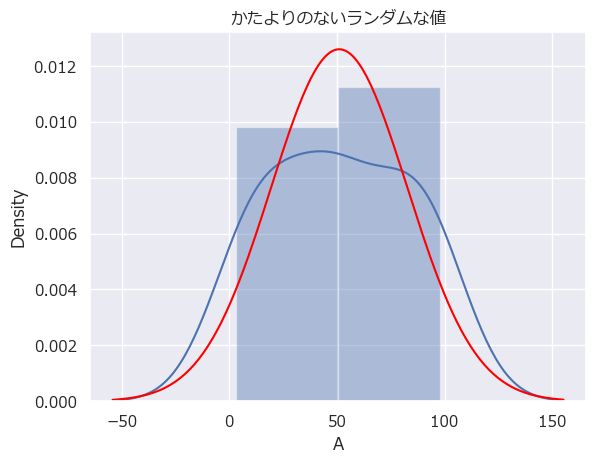

C:\Users\frontier-Python\AppData\Local\Temp\ipykernel_13116\1035616520.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["B"], fit=norm, fit_kws={"color":"red"})


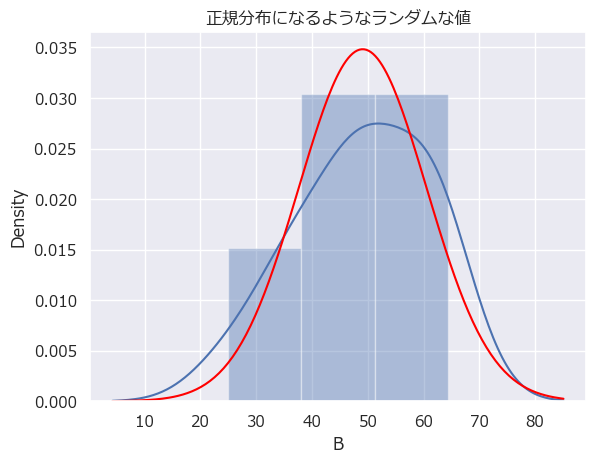

In [19]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm


df = pd.DataFrame({
    "A" : np.random.randint(0, 100, 15),
    "B" : np.random.normal(50, 10, 15)
})

sns.distplot(df["A"], fit=norm, fit_kws={"color":"red"})
plt.title("かたよりのないランダムな値")
plt.show()

sns.distplot(df["B"], fit=norm, fit_kws={"color":"red"})
plt.title("正規分布になるようなランダムな値")
plt.show()

C:\Users\frontier-Python\AppData\Local\Temp\ipykernel_13116\1234784508.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["A"], fit=norm, fit_kws={'color':'red'})


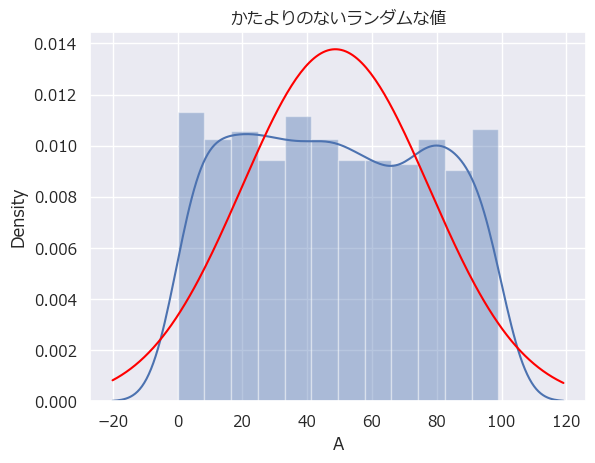

C:\Users\frontier-Python\AppData\Local\Temp\ipykernel_13116\1234784508.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["B"], fit=norm, fit_kws={'color':'red'})


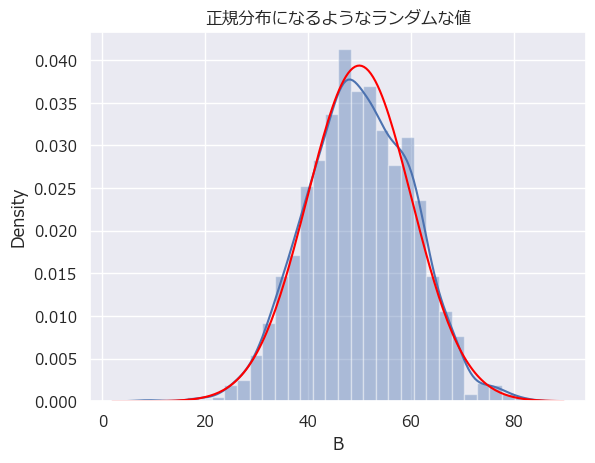

In [20]:
df = pd.DataFrame({
    "A" : np.random.randint(0, 100, 1500),
    "B" : np.random.normal(50, 10, 1500)
})

sns.distplot(df["A"], fit=norm, fit_kws={'color':'red'})
plt.title("かたよりのないランダムな値")
plt.show()

sns.distplot(df["B"], fit=norm, fit_kws={'color':'red'})
plt.title("正規分布になるようなランダムな値")
plt.show()

In [21]:
from scipy.stats import norm

scorelist = [60, 70, 80]
for score in scorelist:
    cdf = norm.cdf(x=score, loc=50, scale=10)
    print("偏差値",score, "は、上から", (1-cdf) * 100, "%")

偏差値 60 は、上から 15.865525393145708 %
偏差値 70 は、上から 2.275013194817921 %
偏差値 80 は、上から 0.13498980316301035 %


In [22]:
perlist = [0.1586, 0.02275, 0.00134]
for per in perlist:
    ppf = norm.ppf(q=(1-per), loc=50, scale=10)
    print("上から", per * 100, "%以上に入るには、偏差値",ppf,"以上が必要")

上から 15.86 %以上に入るには、偏差値 60.002283757327085 以上が必要
上から 2.275 %以上に入るには、偏差値 70.00002443899604 以上が必要
上から 0.134 %以上に入るには、偏差値 80.02240904267309 以上が必要
